### Marketing Attribution using Markov Chains


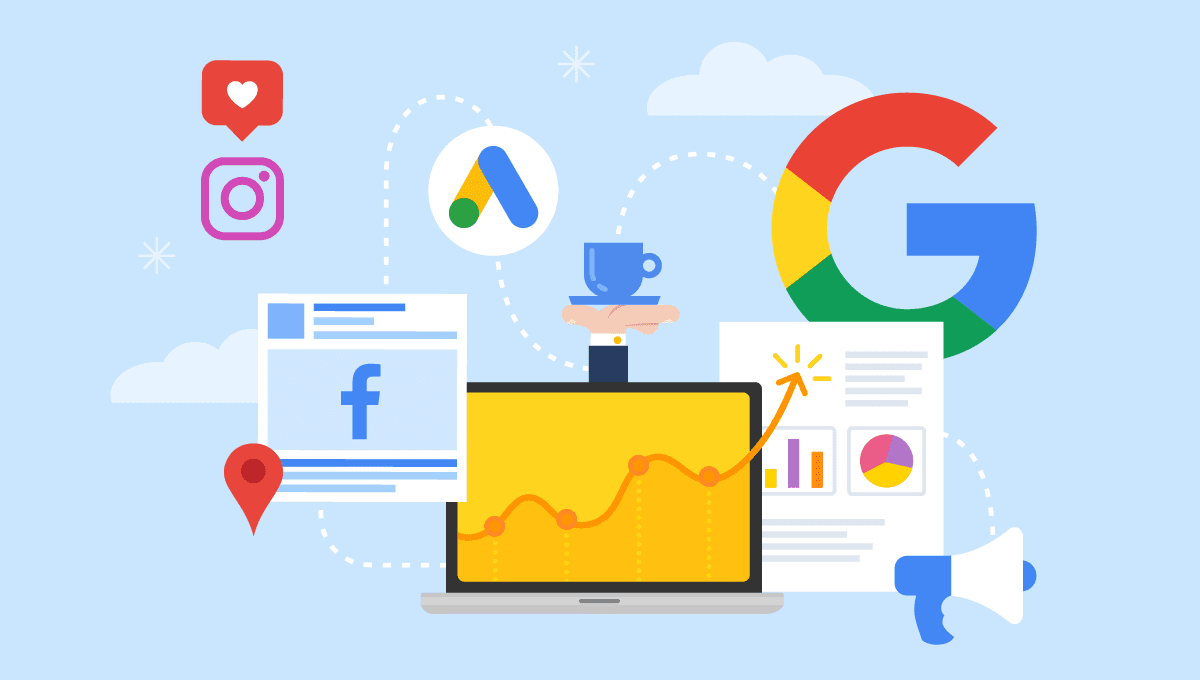

### Problem Overview

Consider that you're a marketer working for a company which  sells product to the customers, as a marketer, you will likely have multiple marketing channels or at least multiple campaigns. The more marketing you run, the more interactions a customer will have with your business. We call all of these interactions for individual customers their customer (or buyer) journey.

For example, let's say they first find out about your business in a facebook ad. After weeks of exposure to different ads, organic content, and offline interactions, they convert. Below is an example of their customer journey.

![picture](https://funnel.io/hs-fs/hubfs/Google%20Drive%20Integration/Blog%20post%20the%20digital%20marketing%20attribution%20problem-2.png?width=936&height=336&name=Blog%20post%20the%20digital%20marketing%20attribution%20problem-2.png)

This may seem simple enough, but the reality is that it is rarely so linear or clear. So much can happen in a customer journey, both online and offline, and we can't easily understand what goes on from when a customer first discovers our brand to the time that they convert. This is the messy middle.

![picture](https://funnel.io/hs-fs/hubfs/Google%20Drive%20Integration/Blog%20post%20the%20digital%20marketing%20attribution%20problem-4.png?width=936&name=Blog%20post%20the%20digital%20marketing%20attribution%20problem-4.png)

#### Problem Description

As a marketer we will have multiple marketing channels or at least multiple campaigns. so we need to allocate conversion credit to each touchpoint in a users' journey and therefore attribute conversions to specific marketing channels. In simpler words we need to find the contribution of each marketing channel in the conversion of user to a purchase, so that we can invest more in the channel which contributes heavier to the customer conversions to increase our sales

**What is contribution?**

Contribution is the science of understanding how your multi-channel marketing strategy contributes to your end result of conversions.

If you increase spend in Facebook ads, what happens to conversions or search volume in Google ads?

Because everything is intrinsically linked, we need to better understand the relationship between all of our channels.

#### Types of Attribution Models

There are multiple attribution models to understand which marketing channel is contributing most to conversions,
- **Last touch attribution model**
   - This is often the default model in most advertising platforms and, as with most models, it is a position based attribution model. It provides all the credit to the last interaction before a user converts
- **First touch attribution model**
   - This model provides all the credits to the first Ad shown to the customer, it is used when a completely a new product is launched, especially in a scenario where first impression will be the impression

- **Linear attribution model**
   - First and last touch are common models, but the issue is they only consider one of the many touchpoints. The step up from this is linear attribution which provides equal credit to all

- **Time decay attribution model**
 - If you want something more similar to last touch, the time decay model is for you. It provides a significant portion of the credit to the last touch and very little credit to the first touch.


### Markov Chains

Consider that we are a company A and we are selling a bluetooth headphoes to the customers, so we are adverstising our product through various marketing channels lets assume we advertise our product through 5 channels

- Instagram
- Online Display
- Paid Search
- Facebook
- Online Video

We want to find the individual contribution of each channel in conversion of users, Lets solve this using the simple probabilistic model called Markov chains
<br>
Now our Ads reach certain population of people and each one of the persons goes through different types of Ad at different order
<br>


For example a person X can go through the following path  
**Online display Ad followed by a Instagram Ad followed by a Paid search Ad and finally he buys the bluetooth from us**
<br>
Similarly each person can go through differnt Ad channels in a different order

#### Constructing a markov chain

Lets constuct a Directed edge graph where each node is a Marketing channel or event and edge between them represent the probability of customer going from one node (channel) to another node (channel)

![picure](https://channelmix.com/wp-content/uploads/2021/04/markov-chain-v2-862x451.jpg)

After constructing the markov chain , we shall compute the value for each edge using probability
<br>
<br>
For Example:
<br>
<br>
**The value of the edge from instagram node to online display node**===> The probabilty of a customer encountering an Online Display Ad after an Instagram Ad
<br>
<br>
We can compute this probability using our data

#### Data overview

Our Dataset has 5 Columns
- **Cookie** : A uniuqe id  which representing a unique user
- **Time** : time stamp of the event
- **Interaction**: The type of interaction between the Ad and user
- **Conversion** : Binary variable which indicates whether a conversion took place or not (whether the user purchased or not)
- **Conversion value**: Value of the potential conversion event
- **Channel**: Channel through which Ad was shown to the customers

Each row contains details about a specific Ad shown to a customer


#### Importing the necessary libraries

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

#### Importing the dataset

In [66]:
# loading dataset
df=pd.read_csv("drive/MyDrive/attribution data.csv")

#### Exploring Data

In [8]:
# printing the first 5 rows of the dataframe
df.head(5)

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [9]:
# checking the shape of the dataset
df.shape
print(f"Our Dataset has {df.shape[0]} rows and {df.shape[1]} no of columns")

Our Dataset has 586737 rows and 6 no of columns


In [ ]:
# printing  the features
for i in df.columns:
    print(i)

cookie
time
interaction
conversion
conversion_value
channel


#### Univariate Analysis

##### 1.**Cookie**

In [43]:
# checking how many unique cookies do we have
df['cookie'].nunique()

240108

Here we have data of 240108 cookies and each cookie refers to an individual person, so totally we have data of 240108 unique persons

##### 2. **Interaction**

<Axes: >

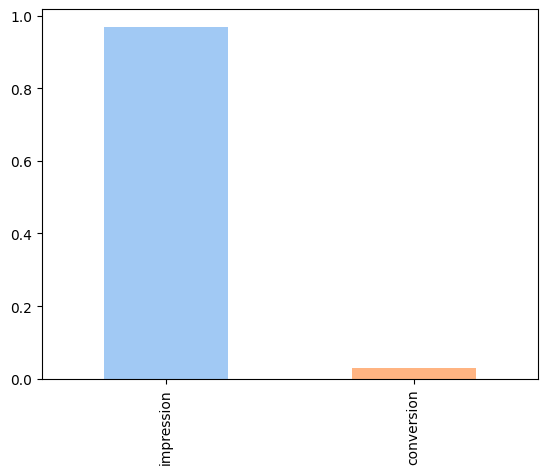

In [24]:
# checking the distribution of interaction
df['interaction'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('pastel'))

We can see than almost 97% of the touch points are just impressions, only 3% of them are conversions

In [21]:
# checking the total no of conversions
df['conversion'].sum()

17639

Out of 586737 events we have 17639 Conversions events (3% Conversion)

##### **3.Time**

In [38]:
earliest_time = df['time'].min()
latest_time = df['time'].max()

print("We have the data\n")
print("From ", pd.to_datetime(earliest_time, format="%Y-%m-%dT%H:%M:%SZ"))
print("To:", pd.to_datetime(latest_time, format="%Y-%m-%dT%H:%M:%SZ"))

We have the data

From  2018-07-01 13:13:16
To: 2018-07-31 23:59:30


We have the data for the month of July 2018

##### 4. **Channel**

In [ ]:
# checking the unique channels
for i in df.channel.unique():
    print(i)

Instagram
Online Display
Paid Search
Facebook
Online Video


Here totally we have 5 channels and we want to attribute total sales to each channel

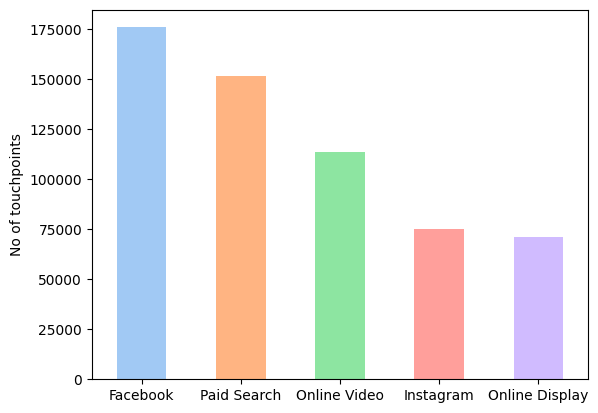

In [42]:
# checking the distribution of channels
df['channel'].value_counts().plot(kind='bar',color=sns.color_palette('pastel'),rot=0)
plt.ylabel("No of touchpoints")
plt.show()

Majority of the Ad was shown via Facebook followed by other channels like Paid Search, Online Video ...etc

In [ ]:
# checking the total no of conversions
df['conversion'].sum()

17639

Out of 586737 events we have 17639 Conversions events  (3% Conversion)

#### Pre-Processing

Sorting the data using the cookie and time


In [46]:
# sorting the df using the
df=df.sort_values(['cookie','time'],ascending=[False,True])

Creating a feature "Visit Order" which captures the chronological order of the event  

In [47]:
# creating a feature visit_order
df['visit_order']=df.groupby('cookie').cumcount()
df.head(5)

,cookie,time,interaction,conversion,conversion_value,channel,visit_order
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14T17:17:12Z,impression,0,0.0,Paid Search,0
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search,0
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video,1
586731,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06T23:30:38Z,impression,0,0.0,Online Display,0
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display,1


Creating a new dataframe which has 2 columns Cookie and the order of events underwent by the respective cookie

In [48]:
def combine(x):
    y=list(x.unique())
    return y

# creating a new feature which captures the order of Ads for each cookie
paths=df.groupby('cookie')['channel'].aggregate(combine)

In [49]:
# dropping the duplicates and getting the cookie and conversion column
dropped=df.drop_duplicates('cookie',keep='last')[['cookie','conversion']]

In [50]:
# merging the both dataframes
dff=pd.merge(dropped,paths,how='left',on='cookie')

Defining a function to add starting and ending events for each path
- Start represent the starting event
- Conversion represent an event in which the customer got converted that is customer made a  purchase
- Null represent an event in which the customer did'nt got converted that is customer didn't made any purchase

In [51]:
# custom function to add 'Start','Conversion','Null' events
def check(d):
    if d['conversion']==0:
        return ['Start']+d['channel']+['Null']
    else:
        return ['Start']+d['channel']+['Conversion']

# creating a new column
dff['path']=dff.apply(check,axis=1)

# selecting only the cookie and path column
df=dff[['cookie','path']]

In [ ]:
# printing the top 20 rows
df.head(20)

,cookie,path
0,ooooohAFofEnonEikhAi3fF9o,"[Start, Paid Search, Null]"
1,ooooiBh70D3k3BfAhDFfii9h7,"[Start, Paid Search, Online Video, Null]"
2,ooooEiB0CCoEf9fiiC90Dfhfk,"[Start, Online Display, Null]"
3,ooooEBE0o0D97ACAAAnDoi3F0,"[Start, Online Display, Null]"
4,ooooE0hkAFBkED90ChDDiBFAf,"[Start, Online Display, Null]"
5,ooooAnkko0k0Dfino0oDkEoEi,"[Start, Paid Search, Online Display, Null]"
6,oooniio7iF9DBA077FBB7FhE3,"[Start, Instagram, Facebook, Null]"
7,ooonih0kon3FDAB90EfADEFnn,"[Start, Facebook, Instagram, Conversion]"
8,ooonFhEoEn03FEAnEF3oChfnh,"[Start, Facebook, Null]"
9,ooon73E3inB907iFof3onf3Fo,"[Start, Online Video, Null]"


In [52]:
# getting the paths
paths_list=df['path']

# counting how many Conversions
total_conversions=0
for i in paths_list:
    if 'Conversion' in i:
        total_conversions+=1

In [53]:
# calculating the conversion rate
conversion_rate=total_conversions/len(paths_list)
conversion_rate

0.07346277508454528

#### Unique Channels

In [55]:
# getting the set of unique channels
unique_channels=set( j for i in paths_list for j in i)
unique_channels

{'Conversion',
 'Facebook',
 'Instagram',
 'Null',
 'Online Display',
 'Online Video',
 'Paid Search',
 'Start'}

#### Possible Transitions

Generating all possible transitions between all of the events(nodes)

In [56]:
# getting all the possible transitions between the nodes

dic={}

# generating the uniuqe pairs of channels
for x in unique_channels:
    # Conversion and Null should not be in the beginning
    if x!='Conversion' and x!='Null':
        for y in unique_channels:
            # Start should not be in the ending
            if y!='Start':
                # no same channels should be in the pair
                if x!=y:
                    dic[x+'->'+y]=0

possible_transitions=dic

In [ ]:
possible_transitions

{'Instagram->Null': 0,
 'Instagram->Conversion': 0,
 'Instagram->Facebook': 0,
 'Instagram->Paid Search': 0,
 'Instagram->Online Display': 0,
 'Instagram->Online Video': 0,
 'Facebook->Null': 0,
 'Facebook->Conversion': 0,
 'Facebook->Instagram': 0,
 'Facebook->Paid Search': 0,
 'Facebook->Online Display': 0,
 'Facebook->Online Video': 0,
 'Start->Null': 0,
 'Start->Conversion': 0,
 'Start->Instagram': 0,
 'Start->Facebook': 0,
 'Start->Paid Search': 0,
 'Start->Online Display': 0,
 'Start->Online Video': 0,
 'Paid Search->Null': 0,
 'Paid Search->Conversion': 0,
 'Paid Search->Instagram': 0,
 'Paid Search->Facebook': 0,
 'Paid Search->Online Display': 0,
 'Paid Search->Online Video': 0,
 'Online Display->Null': 0,
 'Online Display->Conversion': 0,
 'Online Display->Instagram': 0,
 'Online Display->Facebook': 0,
 'Online Display->Paid Search': 0,
 'Online Display->Online Video': 0,
 'Online Video->Null': 0,
 'Online Video->Conversion': 0,
 'Online Video->Instagram': 0,
 'Online Video->

In [57]:
# checking if each transition present in paths of each user if so increment the transition value
for transition in possible_transitions.keys():
    for path in paths_list:
        path="->".join(path)
        if transition in path:
            possible_transitions[transition]+=1
possible_transitions

{'Paid Search->Instagram': 3038,
 'Paid Search->Conversion': 4736,
 'Paid Search->Null': 68476,
 'Paid Search->Online Display': 4269,
 'Paid Search->Facebook': 5725,
 'Paid Search->Online Video': 2596,
 'Instagram->Paid Search': 2266,
 'Instagram->Conversion': 2868,
 'Instagram->Null': 31153,
 'Instagram->Online Display': 1164,
 'Instagram->Facebook': 10822,
 'Instagram->Online Video': 1193,
 'Start->Paid Search': 76210,
 'Start->Instagram': 28618,
 'Start->Conversion': 0,
 'Start->Null': 0,
 'Start->Online Display': 34250,
 'Start->Facebook': 66848,
 'Start->Online Video': 34182,
 'Online Display->Paid Search': 3936,
 'Online Display->Instagram': 1251,
 'Online Display->Conversion': 2144,
 'Online Display->Null': 32236,
 'Online Display->Facebook': 2300,
 'Online Display->Online Video': 737,
 'Facebook->Paid Search': 4464,
 'Facebook->Instagram': 15252,
 'Facebook->Conversion': 4690,
 'Facebook->Null': 59319,
 'Facebook->Online Display': 2146,
 'Facebook->Online Video': 2254,
 'Online

In the Above dictionary
- **key**: it is the path or sequence in which customer encounters Ads from various marketing channels
- **Value**: it is the no of customers went through the path
<br>
<br>
For example, The key 'Online Video---> Online Display' has the value 775 it indicates 775 cusomers went from Online Display

#### Transition Probabilities
Calculating the transition probabilities

In [58]:
# definfing a list which as all of the states (Nodes)
lst=list(unique_channels)
lst

['Paid Search',
 'Instagram',
 'Conversion',
 'Null',
 'Start',
 'Online Display',
 'Facebook',
 'Online Video']

Lets create a transition probability matrix which stores the transition probabilites

In [59]:
# creating the Transition Prob matrix wh
prob_matrix=np.matrix(np.zeros((8,8)))
prob_matrix

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [60]:
# filling the probability matrix
for i,j in possible_transitions.items():
    i=i.split('->')

    # findind the row
    row=lst.index(i[0])
    # finding the column
    col=lst.index(i[1])

    # setting the value of prob matrix
    prob_matrix[row,col]=j
prob_matrix

matrix([[    0.,  3038.,  4736., 68476.,     0.,  4269.,  5725.,  2596.],
        [ 2266.,     0.,  2868., 31153.,     0.,  1164., 10822.,  1193.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
        [76210., 28618.,     0.,     0.,     0., 34250., 66848., 34182.],
        [ 3936.,  1251.,  2144., 32236.,     0.,     0.,  2300.,   737.],
        [ 4464., 15252.,  4690., 59319.,     0.,  2146.,     0.,  2254.],
        [ 1964.,  1307.,  3201., 31285.,     0.,   775.,  2430.,     0.]])

In [61]:
# calculating probabilities (dividing each element by the row sum)
prob_matrix=prob_matrix/prob_matrix.sum(axis=1)

# replacing the Nan with Zeros
np.nan_to_num(prob_matrix, copy=False, nan=0.0, posinf=None, neginf=None)
prob_matrix

<ipython-input-61-dd494d05632d>:2: RuntimeWarning: invalid value encountered in divide
  prob_matrix=prob_matrix/prob_matrix.sum(axis=1)


matrix([[0.        , 0.03419631, 0.05330932, 0.77077893, 0.        ,
         0.04805268, 0.06444169, 0.02922107],
        [0.04580924, 0.        , 0.05797922, 0.62978612, 0.        ,
         0.02353131, 0.21877653, 0.02411758],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.31739884, 0.11918803, 0.        , 0.        , 0.        ,
         0.14264414, 0.27840805, 0.14236094],
        [0.09238569, 0.02936344, 0.05032391, 0.75664257, 0.        ,
         0.        , 0.05398554, 0.01729885],
        [0.05065532, 0.17307234, 0.05321986, 0.6731234 , 0.        ,
         0.02435177, 0.        , 0.0255773 ],
        [0.04794688, 0.03190762, 0.0781456 , 0.76375665, 0.        ,
         0.01891997, 0.05932328, 0.        ]])

<Axes: >

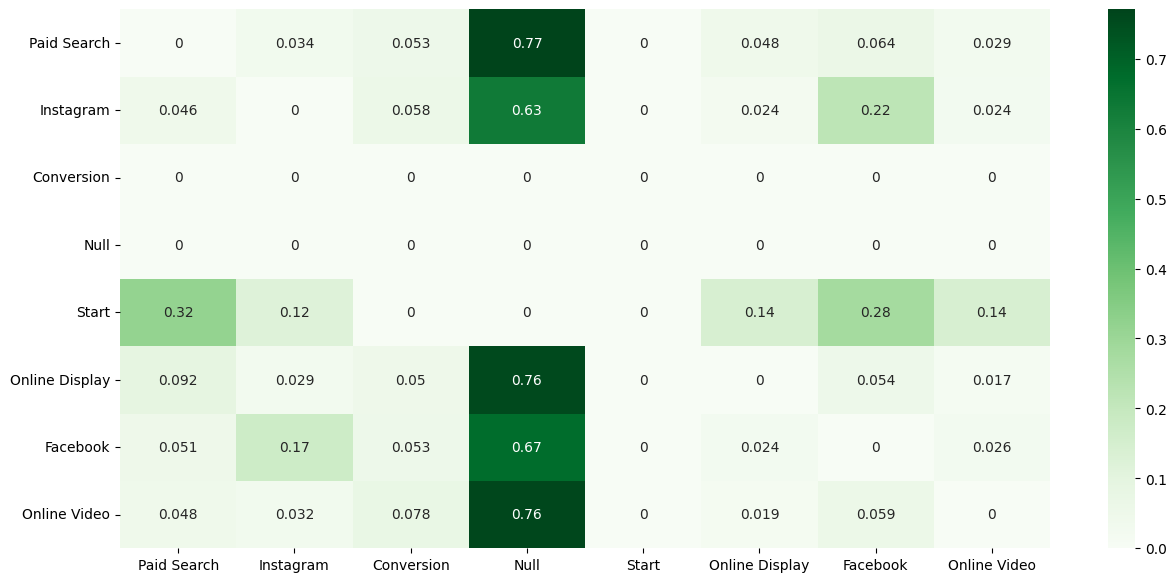

In [62]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(prob_matrix,annot=True,xticklabels=lst,yticklabels=lst,cmap="Greens",ax=ax)

The above heatmap represents the transtion probability matrix
- An element Aij represents the probability of going from ith state to jth state

#### Removal Effect and Contribution of each channel

To find the contribution of a Channel i
- **PCi** : Calculate the total probability
-**P'Ci** : Remove the node that corresponds to that channel i and then calculate the total probability
- **Contribution of Channel i** : 1-(PCi/P'Ci)

In [63]:
# definfing a function which computes the removal effect of a channel

def removal_effect(channel,data):

    # calculating the probability of conversion before the removal of channel
    before_removing=data['conversion'].sum()/len(data)
    conversions=data['conversion'].sum()

    # removing the channel
    removed=data[data['channel']!=channel]

    #calculating the prob of conversion after removing the channel
    after_removing=removed['conversion'].sum()/len(data)

    # calculating the contribution
    contribution=1-(after_removing/before_removing)

    return contribution


In [ ]:
# inbetween we have modified the original df so lets import it freshly
df=pd.read_csv("drive/MyDrive/attribution data.csv")

Let's go through each marketing channel and find its contribution




In [67]:
# iterating over the channels and finding the contribution of each channel
contributions={}
for channel in lst:
    contributions[channel]=removal_effect(channel,df)
contributions

{'Paid Search': 0.2577810533476954,
 'Instagram': 0.12721809626396063,
 'Conversion': 0.0,
 'Null': 0.0,
 'Start': 0.0,
 'Online Display': 0.12126537785588765,
 'Facebook': 0.3005272407732865,
 'Online Video': 0.19320823175917}

In [68]:
re_sum=np.sum([i for i in contributions.values()])
attributions={k: (v / re_sum) *total_conversions for k, v in contributions.items()}
del attributions['Start'],attributions['Conversion'],attributions['Null']

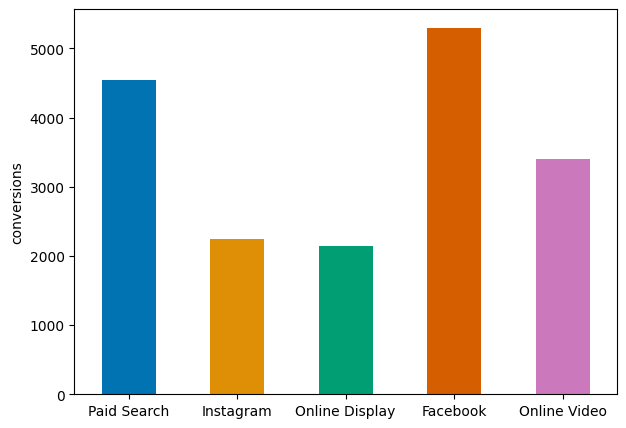

In [87]:
# plotting the individual contributions of each channels
attributions=pd.Series(attributions)
attributions.plot(kind='bar',rot=0,figsize=(7,5),color=sns.color_palette('colorblind'))
plt.ylabel("conversions")
plt.show()

##### **From the above Bar plot it is evident that Facebook channels contributes heavier to the conversion followed by Paid Search Channel, Online Video Channel, Instagram and Online Display**